In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)
def NDD(x, y):
    n = len(x) # = len(y)
    coeff = np.zeros((n,n))
    coeff[:,0] = y              # Row 0 elements changed to y in order 
    for i in range(1,n):        # Row 0 must be unchanged for divided diff to work
        for j in range(n-i):    # Upper Left Triangular Matrix
            x1 = x[j]
            x2 = x[j+i]
            y1 = coeff[j, i-1]
            y2 = coeff[j+1, i-1]
            coeff[j,i] = difference(y2, y1, x2, x1)
    return coeff[0]             # First row contains the required coefficients a_k

class NewtonsDividedDifference:
    def __init__(self, differences, data_x):
        self.differences = differences
        self.data_x = data_x
        self.degree = len(data_x) - 1
    
    def n_k(self, k, x):
        if k == 0:
            return 1

        ans = 1
        for i in range(k):
            ans *= (x - self.data_x[i])
        return ans
    
    def __call__(self, x_arr):
        p_x_arr = []
        for i in range(len(x_arr)):
            p_x = 0
            for k in range(self.degree+1):
                p_x += self.differences[k]*self.n_k(k, x_arr[i])
            p_x_arr.append(p_x)
        return p_x_arr

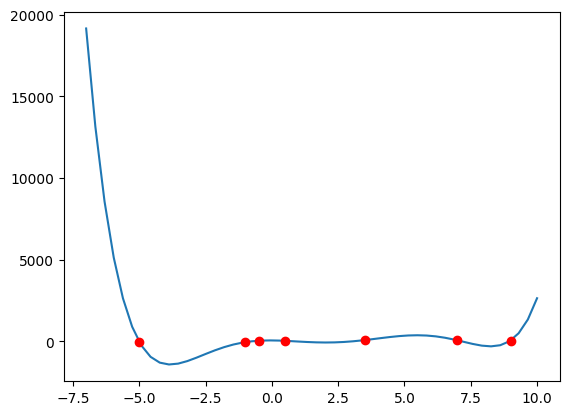

In [ ]:
data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
differences = NDD(list(data_x), list(data_y))
p = NewtonsDividedDifference(list(differences),data_x)
test_x = np.linspace(-7, 10, 50, endpoint=True)
test_y = p(test_x)

plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()